In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from scipy import stats

The data was acquired from: https://www.kaggle.com/anthonypino/melbourne-housing-market/data

In [2]:
df = pd.read_csv(r'C:\Users\owner\MELBOURNE_HOUSE_PRICES_LESS.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [4]:
df['House'] = np.where(df.Type == 'h', 1, 0)

In [5]:
df.shape

(52964, 13)

In [38]:
#df[df.Price.isnull()==True]

In [7]:
df.describe()

,Rooms,Price,Propertycount,Distance,House
count,52964.000000,4.119600e+04,52964.000000,52964.000000,52964.000000
mean,3.115512,1.001993e+06,7610.820595,12.704475,0.718545
std,0.960792,6.033969e+05,4414.860634,7.631408,0.449713
min,1.000000,8.500000e+04,39.000000,0.000000,0.000000
25%,3.000000,6.170000e+05,4380.000000,7.000000,0.000000
50%,3.000000,8.350000e+05,6795.000000,11.400000,1.000000
75%,4.000000,1.225000e+06,10412.000000,16.700000,1.000000
max,31.000000,1.120000e+07,21650.000000,65.000000,1.000000


In [8]:
df = df.dropna(subset=['Price'])

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


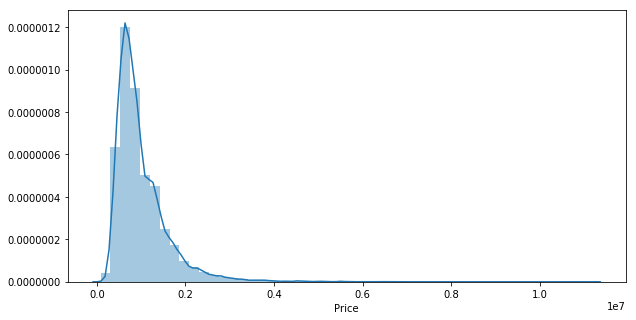

In [9]:
plt.figure(figsize = (10,5))
sns.distplot(df.Price)

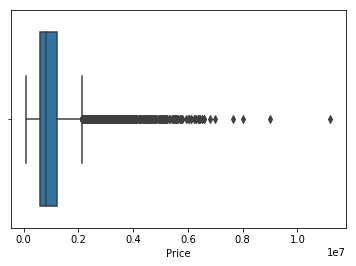

In [10]:
sns.boxplot(df.Price)

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


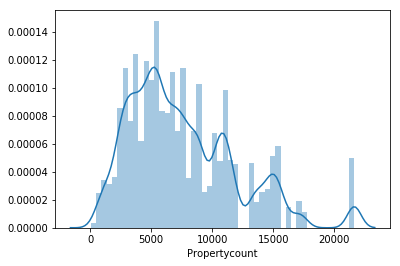

In [11]:
sns.distplot(df.Propertycount)

In [12]:
df[df.Price == 1.120000e+07]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Regionname,Propertycount,Distance,CouncilArea,House
49540,Brighton,6 Cole St,4,h,11200000.0,VB,hockingstuart,28/10/2017,Southern Metropolitan,10579,10.5,Bayside City Council,1


c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


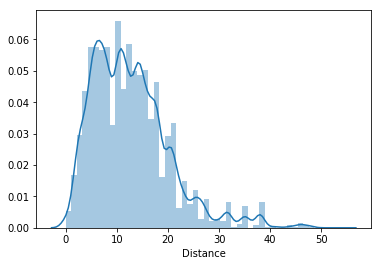

In [13]:
sns.distplot(df.Distance)

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


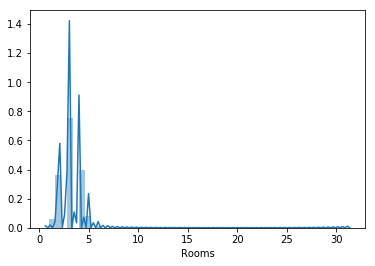

In [14]:
sns.distplot(df.Rooms)

In [15]:
df.corr()

,Rooms,Price,Propertycount,Distance,House
Rooms,1.000000,0.409076,-0.059256,0.272728,0.486556
Price,0.409076,1.000000,-0.059896,-0.255966,0.291687
Propertycount,-0.059256,-0.059896,1.000000,0.012508,-0.047912
Distance,0.272728,-0.255966,0.012508,1.000000,0.234571
House,0.486556,0.291687,-0.047912,0.234571,1.000000


In [16]:
from sklearn.cross_decomposition import PLSRegression

In [17]:
regr = linear_model.LinearRegression()

Y=df['Price']
X = df[['Rooms']]

regr.fit(X,Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept:\n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coefficients: 
 [260136.30042983]

Intercept:
 201402.19055985776

R-squared:
0.16734347242039083


In [18]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df[['Rooms', 'Distance', 'Propertycount', 'House']])

regr.fit(X_scaled,Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept:\n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_scaled,Y))

validation_score = cross_val_score(regr, X_scaled, Y, cv=10)
print('\nCross-validation:\n',validation_score)


Coefficients: 
 [ 262752.39562194 -250917.25791411  -12333.44469056  106424.28015281]

Intercept:
 1001992.5564617924

R-squared:
0.33725063000907707

Cross-validation:
 [0.3504903  0.31471945 0.34596124 0.3529758  0.33282622 0.3464818
 0.33563512 0.34710506 0.28479249 0.32463048]


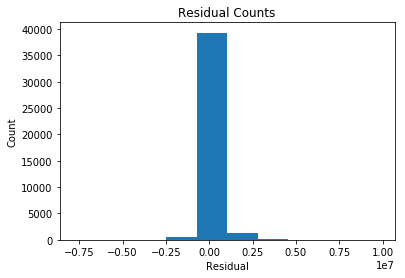

In [19]:
predicted = regr.predict(X_scaled).ravel()
actual= Y

residual = actual - predicted

plt.hist(residual)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

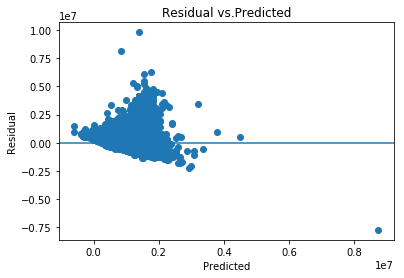

In [20]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs.Predicted')
plt.show()

# KNN Regression

In [25]:
from sklearn.model_selection import train_test_split

knn = neighbors.KNeighborsRegressor(n_neighbors =20)

X= df[['Rooms', 'Distance', 'Propertycount', 'House']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=89)

knn.fit(X_train, Y_train)

score = knn.score(X_test, Y_test)
#score_one = cross_val_score(knn, X, Y, cv=5)
print(score)

0.7054337409710212


In [26]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors =90, weights = 'distance')

X_one = pd.DataFrame({
    'Rooms': stats.zscore(df.Rooms),
    'Distance': stats.zscore(df.Distance),
    'Propertycount': stats.zscore(df.Propertycount),
    'House': stats.zscore(df.House)
})

X_train, X_test, Y_train, Y_test = train_test_split(X_one, Y, test_size=0.2, random_state=89)
knn_w.fit(X_train, Y_train)

score_w = knn_w.score(X_test, Y_test)
print(score_w)

0.7141066932943436


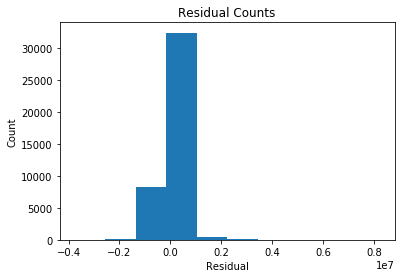

In [27]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(knn_w, X_one, Y).ravel()
actual= Y

residual = actual - predicted

plt.hist(residual)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

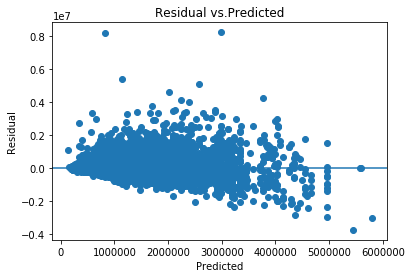

In [28]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs.Predicted')
plt.show()

In [29]:
scores = []
numbers = []
weights = []
for number in range(1, 100):
    for weight in ['uniform', 'distance']:
        knn_l = neighbors.KNeighborsRegressor(n_neighbors =number, weights = weight)
        knn_l.fit(X_train, Y_train)
        scores.append(knn_l.score(X_test, Y_test))
        numbers.append(number)
        weights.append(weight)

In [30]:
results = pd.DataFrame(scores)
results.columns = ['scores']
results['number'] = numbers
results['weights'] = weights

In [31]:
distance = results.loc[results.weights == 'distance']
uniform = results.loc[results.weights == 'uniform']

Text(0.5,1,'Validation Scores with Uniform Weighting')

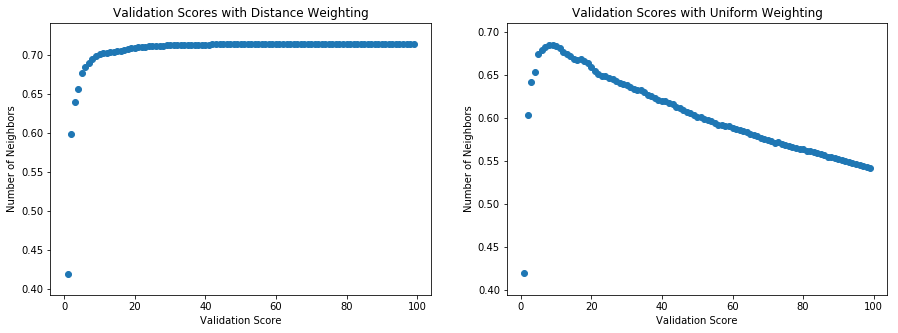

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(x=distance.number, y=distance.scores)
plt.xlabel('Validation Score')
plt.ylabel('Number of Neighbors')
plt.title('Validation Scores with Distance Weighting')

plt.subplot(122)
plt.scatter(x=uniform.number, y=uniform.scores)
plt.xlabel('Validation Score')
plt.ylabel('Number of Neighbors')
plt.title('Validation Scores with Uniform Weighting')

# The Best Validation Score Computationally

In [33]:
#sorted, found the max score of 0.714413
sorted_list = results.scores.sort_values(ascending=False).reset_index(drop=True)

In [34]:
print(sorted_list[0])

0.7144131092383281


In [35]:
results[results['scores'] == sorted_list[0]]

,scores,number,weights
115,0.714413,58,distance


# Plotting as Part of the For-Loop

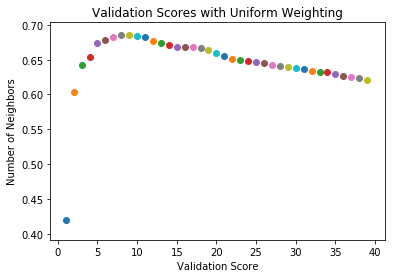

In [36]:
scores = []
for number in range(1, 40):
        knn_l = neighbors.KNeighborsRegressor(n_neighbors =number)
        knn_l.fit(X_train, Y_train)
        score = knn_l.score(X_test, Y_test)
        scores.append(score)
        plt.scatter(x=number, y=score)
        plt.xlabel('Validation Score')
        plt.ylabel('Number of Neighbors')
        plt.title('Validation Scores with Uniform Weighting')
#print(scores)

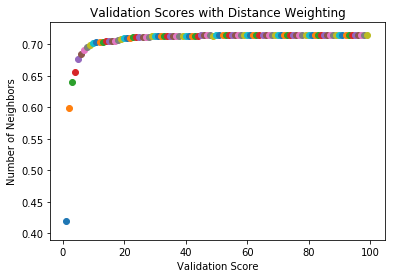

In [37]:
scores_new = []
for number in range(1, 100):
        knn_m = neighbors.KNeighborsRegressor(n_neighbors =number, weights='distance')
        knn_m.fit(X_train, Y_train)
        score = knn_m.score(X_test, Y_test)
        scores.append(score)
        plt.scatter(x=number, y=score)
        plt.xlabel('Validation Score')
        plt.ylabel('Number of Neighbors')
        plt.title('Validation Scores with Distance Weighting')

For this dataset, I applied two algorithms: OLS regression and KNN regression. The dataset had only few continuous variables that I could use as features. Additionally, the distributions of each of the features were not symmetrical. For a linear regression to be effective, a few assumptions must be met: a linear relationship between features and the outcome variable, multivariate normality, homoscedasticity, and low multicollinearity. We had problems with all of the above. 

On the other hand, KNN model simply compares each datapoint to the specified number of 'neighbors', without any particular regard to their distribution. The only requirement is that our train set is densely populated in the same area as our test set. In terms of r2 scores, KNN model outperformed our linear regression model. However, we had a few features ('Rooms' and 'House' which are categorical and are not ideal for KNN model). 